In [7]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# File to Load
path_2015 = "../2015_df.csv"
path_2016 = "../2016_df.csv"
path_2017 = "../2017_df.csv"

# Read csv Data File and store into Pandas Data Frames
runner_2015_df = pd.read_csv(path_2015)
runner_2016_df = pd.read_csv(path_2016)
runner_2017_df = pd.read_csv(path_2017)

In [9]:
runnertime_2015_df=runner_2015_df.loc[:,["Name","Official Time"]]
runnertime_2015_df.head()

,Name,Official Time
0,"Desisa, Lelisa",2:09:17
1,"Tsegay, Yemane Adhane",2:09:48
2,"Chebet, Wilson",2:10:22
3,"Kipyego, Bernard",2:10:47
4,"Korir, Wesley",2:10:49


In [10]:
runnertime_2016_df=runner_2016_df.loc[:,["Name","Official Time"]]
runnertime_2016_df.head()

,Name,Official Time
0,"Hayle, Lemi Berhanu",2:12:45
1,"Desisa, Lelisa",2:13:32
2,"Tsegay, Yemane Adhane",2:14:02
3,"Korir, Wesley",2:14:05
4,"Lonyangata, Paul",2:15:45


In [11]:
runnertime_2017_df=runner_2017_df.loc[:,["Name","Official Time"]]
runnertime_2017_df.head()

,Name,Official Time
0,"Kirui, Geoffrey",2:09:37
1,"Rupp, Galen",2:09:58
2,"Osako, Suguru",2:10:28
3,"Biwott, Shadrack",2:12:08
4,"Chebet, Wilson",2:12:35


In [12]:
runnertime_20152016_df = pd.merge(runnertime_2015_df,runnertime_2016_df,on="Name")
runnertime_20162017_df = pd.merge(runnertime_2016_df,runnertime_2017_df,on="Name")
runnertime_20152017_df = pd.merge(runnertime_2015_df,runnertime_2017_df,on="Name")
runnertime_20152016_df.head()

,Name,Official Time_x,Official Time_y
0,"Desisa, Lelisa",2:09:17,2:13:32
1,"Tsegay, Yemane Adhane",2:09:48,2:14:02
2,"Korir, Wesley",2:10:49,2:14:05
3,"Mercier, Christian",2:24:37,2:34:30
4,"Boudalia, Said Sr.",2:24:49,2:27:41


In [13]:
total_20152016 = runnertime_20152016_df.sum()
total_20152016

Name               Desisa, LelisaTsegay, Yemane AdhaneKorir, Wesl...
Official Time_x    2:09:172:09:482:10:492:24:372:24:492:25:092:25...
Official Time_y    2:13:322:14:022:14:052:34:302:27:412:33:562:32...
dtype: object

In [14]:
runnertime_20152016_df['time_difference_20152016'] = runnertime_20152016_df.apply(lambda _: '', axis=1)
runnertime_20162017_df['time_difference_20152016'] = runnertime_20152016_df.apply(lambda _: '', axis=1)
runnertime_20152017_df['time_difference_20152016'] = runnertime_20152016_df.apply(lambda _: '', axis=1)
runnertime_20152016_df.head()

,Name,Official Time_x,Official Time_y,time_difference_20152016
0,"Desisa, Lelisa",2:09:17,2:13:32,
1,"Tsegay, Yemane Adhane",2:09:48,2:14:02,
2,"Korir, Wesley",2:10:49,2:14:05,
3,"Mercier, Christian",2:24:37,2:34:30,
4,"Boudalia, Said Sr.",2:24:49,2:27:41,


In [15]:
def time_convert(x):
   times = x.split(':')
   return (3600*int(times[0])+60*int(times[1]))+int(times[2])

In [16]:
#compare the time with previous year ,if runtime difference a negative number, runner's performance improved.
runnertime_20152016_df["Official Time_2015"]=runnertime_20152016_df["Official Time_x"].apply(time_convert)
runnertime_20152016_df["Official Time_2016"]=runnertime_20152016_df["Official Time_y"].apply(time_convert)
runnertime_20152016_df["time_difference_20152016"] = runnertime_20152016_df["Official Time_2016"]-runnertime_20152016_df["Official Time_2015"]

runnertime_20162017_df["Official Time_2016"]=runnertime_20162017_df["Official Time_x"].apply(time_convert)
runnertime_20162017_df["Official Time_2017"]=runnertime_20162017_df["Official Time_y"].apply(time_convert)
runnertime_20162017_df["time_difference_20162017"] = runnertime_20162017_df["Official Time_2017"]-runnertime_20162017_df["Official Time_2016"]

runnertime_20152017_df["Official Time_2015"]=runnertime_20152016_df["Official Time_x"].apply(time_convert)
runnertime_20152017_df["Official Time_2017"]=runnertime_20152016_df["Official Time_y"].apply(time_convert)
runnertime_20152017_df["time_difference_20152017"] = runnertime_20152017_df["Official Time_2017"]-runnertime_20152017_df["Official Time_2015"]
runnertime_20152017_df.head()

,Name,Official Time_x,Official Time_y,time_difference_20152016,Official Time_2015,Official Time_2017,time_difference_20152017
0,"Chebet, Wilson",2:10:22,2:12:35,,7757,8012,255
1,"Korir, Wesley",2:10:49,2:18:14,,7788,8042,254
2,"Keflezighi, Meb",2:12:42,2:17:00,,7849,8045,196
3,"Mercier, Christian",2:24:37,2:44:34,,8677,9270,593
4,"Boudalia, Said Sr.",2:24:49,2:30:11,,8689,8861,172


In [17]:
runnertime_20152017_df["Official Time_2015"]=runnertime_20152016_df["Official Time_x"].apply(time_convert)
runnertime_20152017_df["Official Time_2017"]=runnertime_20152016_df["Official Time_y"].apply(time_convert)
runnertime_20152017_df["time_difference_20152017"] = runnertime_20152017_df["Official Time_2017"]-runnertime_20152017_df["Official Time_2015"]
runnertime_20152017_df.head()

,Name,Official Time_x,Official Time_y,time_difference_20152016,Official Time_2015,Official Time_2017,time_difference_20152017
0,"Chebet, Wilson",2:10:22,2:12:35,,7757,8012,255
1,"Korir, Wesley",2:10:49,2:18:14,,7788,8042,254
2,"Keflezighi, Meb",2:12:42,2:17:00,,7849,8045,196
3,"Mercier, Christian",2:24:37,2:44:34,,8677,9270,593
4,"Boudalia, Said Sr.",2:24:49,2:30:11,,8689,8861,172


In [18]:
average_2015 = runnertime_20152017_df["Official Time_2015"].mean()
average_2015

11944.207091469681

In [19]:
average_2016 = runnertime_20162017_df["Official Time_2016"].mean()
average_2016

13556.17057057057

In [20]:
average_2017 = runnertime_20152017_df["Official Time_2017"].mean()
average_2017

12704.183967112025

In [40]:
average_201520162017_df = pd.DataFrame({
    "2015 Average Time": [11960.335443037975],
    "2016 Average Time": [13559.686297838589],
    "2017 Average Time": [12721.600506329114]})
average_201520162017_df

,2015 Average Time,2016 Average Time,2017 Average Time
0,11960.335443,13559.686298,12721.600506


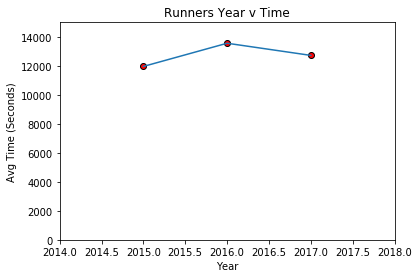

In [41]:
years = [2015,2016,2017]
avg_time = [11960.335443,13559.686298,12721.600506]
plt.scatter(years,avg_time , marker="o", facecolors="red", edgecolors="black")
plt.plot(years,avg_time)
plt.ylim(0,15000)
plt.xlim(2014,2018)
plt.title("Runners Year v Time")
plt.xlabel("Year")
plt.ylabel("Avg Time (Seconds)")
plt.show()

In [42]:
runnertime_20152016_df['time_difference_20152016_sign'] = np.sign(runnertime_20152016_df.time_difference_20152016)
runnertime_20152016_grouped_df=runnertime_20152016_df.groupby('Name').time_difference_20152016_sign.value_counts()
print (runnertime_20152016_grouped_df.head())

Name                 time_difference_20152016_sign
Abanses, Jolene C    -1                               1
Abber, Tracy          1                               1
Abbott, Wendy        -1                               1
Abdallah, Michael A   1                               1
Abdulmassih, Tiana    1                               1
Name: time_difference_20152016_sign, dtype: int64


In [43]:
# this will count "1.0" (positive change) and "-1.0" (negative change)
pos_neg_df_20152016 = runnertime_20152016_df['time_difference_20152016_sign'].value_counts()
pos_neg_df_20152016.head()

 1    4203
-1    1386
 0       2
Name: time_difference_20152016_sign, dtype: int64

In [44]:
runnertime_20162017_df['time_difference_20162017_sign'] = np.sign(runnertime_20162017_df.time_difference_20162017)
runnertime_20162017_grouped_df=runnertime_20162017_df.groupby('Name').time_difference_20162017_sign.value_counts()
print(runnertime_20162017_grouped_df.head())

Name                 time_difference_20162017_sign
Abanses, Jolene C     1                               1
Abber, Tracy          1                               1
Abbott, Patricia     -1                               1
Abbott, Wendy        -1                               1
Abdallah, Michael A  -1                               1
Name: time_difference_20162017_sign, dtype: int64


In [45]:
pos_neg_df_20162017 = runnertime_20162017_df['time_difference_20162017_sign'].value_counts()
pos_neg_df_20162017.head()

 1    3158
-1    1881
 0       4
Name: time_difference_20162017_sign, dtype: int64

In [46]:
runnertime_20152017_df['time_difference_20152017_sign'] = np.sign(runnertime_20152017_df.time_difference_20152017)
runnertime_20152017_grouped_df=pd.DataFrame(runnertime_20152017_df.groupby('Name').time_difference_20152017_sign.value_counts())
runnertime_20152016_grouped_df.head(5)

Name                 time_difference_20152016_sign
Abanses, Jolene C    -1                               1
Abber, Tracy          1                               1
Abbott, Wendy        -1                               1
Abdallah, Michael A   1                               1
Abdulmassih, Tiana    1                               1
Name: time_difference_20152016_sign, dtype: int64

In [47]:
pos_neg_df_20152017 = runnertime_20152017_df['time_difference_20152017_sign'].value_counts()
pos_neg_df_20152017.head()

 1    3150
-1     798
 0       2
Name: time_difference_20152017_sign, dtype: int64

In [48]:
#find the change is 2(not improved at all) and -2(all improved).


Text(0.5,1,'Runner Time 2015 vs.2016')

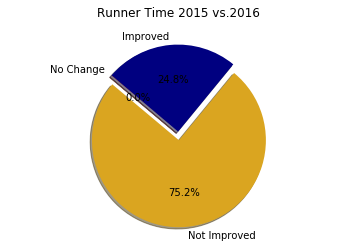

In [75]:
labels = [ "Not Improved","Improved","No Change"]
sizes = [4203, 1386, 2]
colors = ["goldenrod","navy", "orangered"]
explode = (0.1, 0, 0)
plt.axis("equal")
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Runner Time 2015 vs.2016")

Text(0.5,1,'Runner Time 2016 vs.2017')

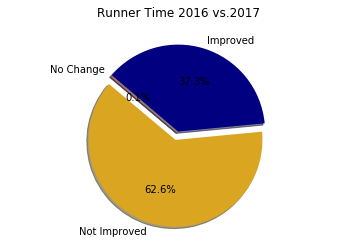

In [76]:
labels = [ "Not Improved","Improved","No Change"]
sizes = [3158, 1881, 4]
colors = ["goldenrod","navy", "orangered"]
explode = (0.1, 0, 0)
plt.axis("equal")
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Runner Time 2016 vs.2017")

Text(0.5,1,'Runner Time 2015 vs.2017')

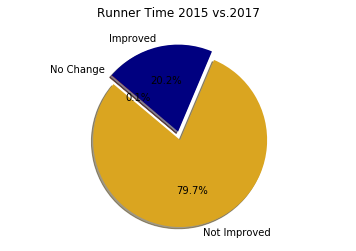

In [77]:
labels = [ "Not Improved","Improved","No Change"]
sizes = [3150, 798, 2]
colors = ["goldenrod","navy", "orangered"]
explode = (0.1, 0, 0)
plt.axis("equal")
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Runner Time 2015 vs.2017")

In [52]:
num=0
for index,row in runnertime_20152017_df.head(50).iterrows():
    num+=1
    x= [2015,2017]
    y=[row['Official Time_2015'],row['Official Time_2016']]
    plt.plot(x,y,marker='', linewidth=1,alpha=0.9, )
    plt.title("Runner Time 2015 vs.2016")
plt.show()

KeyError: 'Official Time_2016'

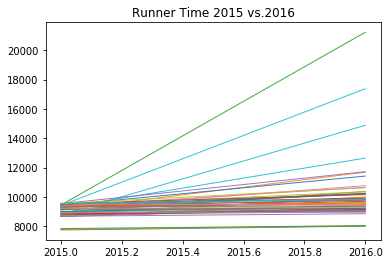

In [193]:
num=0
for index,row in runnertime_20152016_df.head(50).iterrows():
    num+=1
    x= [2015,2016]
    y=[row['Official Time_2015'],row['Official Time_2016']]
    plt.plot(x,y,marker='', linewidth=1,alpha=0.9, )
    plt.title("Runner Time 2015 vs.2016")
plt.show()
   

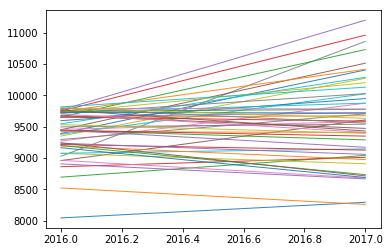

In [146]:
num=0
for index,row in runnertime_20162017_df.head(50).iterrows():
    num+=1
    x=[2016,2017]
    y=[row['Official Time_2016'],row['Official Time_2017']]
    plt.plot(x,y,marker='', linewidth=1, alpha=0.9)    
plt.show()

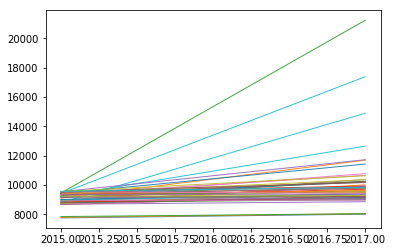

In [145]:
num=0
for index,row in runnertime_20152017_df.head(50).iterrows():
    num+=1
    x=[2015,2017]
    y=[row['Official Time_2015'],row['Official Time_2017']]
    plt.plot(x,y,marker='', linewidth=1, alpha=0.9)    
plt.show()

In [151]:
#time_difference_201520162017_sign_df = pd.merge(runnertime_20152016_grouped_df,runnertime_20162017_grouped_df,on="Name")
#time_difference_201520162017_sign_df.head()

In [99]:
runnertime_201520162017_df=runnertime_201520162017_df.loc[:,["Name","time_difference_20152016","time_difference_20162017"]]
runnertime_201520162017_df.head()

,Name,time_difference_20152016,time_difference_20162017
0,"Korir, Wesley",196,249
1,"Mercier, Christian",593,604
2,"Boudalia, Said Sr.",172,150
3,"Deba, Buzunesh",527,-178
4,"Ayr, Jason M.",450,-475


In [100]:
runnertime_201520162017_df['time_difference_201520162017'] = runnertime_20152016_df.apply(lambda _: '', axis=1)
runnertime_201520162017_df.head()

,Name,time_difference_20152016,time_difference_20162017,time_difference_201520162017
0,"Korir, Wesley",196,249,
1,"Mercier, Christian",593,604,
2,"Boudalia, Said Sr.",172,150,
3,"Deba, Buzunesh",527,-178,
4,"Ayr, Jason M.",450,-475,


In [11]:
runner_2017_df = runner_2017_df[(runner_2017_df[["Bib","Name","M/F","5K","10K",
                                                 "15K","20K","25K","30K","35K",
                                                 "40K", "Pace","Official Time", 
                                                 "Overall", "Year"]] != "-").all(axis=1)]

In [12]:
runner_2016_df = runner_2016_df[(runner_2016_df[["Bib","Name","M/F","5K","10K",
                                                 "15K","20K","25K","30K","35K",
                                                 "40K", "Pace","Official Time", 
                                                 "Overall", "Year"]] != "-").all(axis=1)]


In [13]:
runner_2015_df = runner_2015_df[(runner_2015_df[["Bib","Name","M/F","5K","10K",
                                                 "15K","20K","25K","30K","35K",
                                                 "40K", "Pace","Official Time", 
                                                 "Overall", "Year"]] != "-").all(axis=1)]

In [14]:
# List of Data Frame to combine
list_df = [runner_2015_df, runner_2016_df, runner_2017_df]

final_runners_df = pd.concat(list_df)

# Replace blank cell with NaN
final_runners_df.replace("", np.nan, inplace=True)

# Drop NaN
final_runners_df = final_runners_df.dropna(how="any")

In [15]:
# Export all Data Frame into csv files
runner_2015_df.to_csv("2015_df.csv")
runner_2016_df.to_csv("2016_df.csv")
runner_2017_df.to_csv("2017_df.csv")
final_runners_df.to_csv("final_runners_df.csv")

In [53]:
runnertime_20152016_2017_df = pd.merge(runnertime_20152016_df,runnertime_20162017_df,on="Name")
runnertime_20152016_2017_df.head()

,Name,Official Time_x_x,Official Time_y_x,time_difference_20152016_x,Official Time_2015,Official Time_2016_x,time_difference_20152016_sign,Official Time_x_y,Official Time_y_y,time_difference_20152016_y,Official Time_2016_y,Official Time_2017,time_difference_20162017,time_difference_20162017_sign
0,"Korir, Wesley",2:10:49,2:14:05,196,7849,8045,1,2:14:05,2:18:14,,8045,8294,249,1
1,"Mercier, Christian",2:24:37,2:34:30,593,8677,9270,1,2:34:30,2:44:34,,9270,9874,604,1
2,"Boudalia, Said Sr.",2:24:49,2:27:41,172,8689,8861,1,2:27:41,2:30:11,,8861,9011,150,1
3,"Deba, Buzunesh",2:25:09,2:33:56,527,8709,9236,1,2:33:56,2:30:58,,9236,9058,-178,-1
4,"Ayr, Jason M.",2:25:14,2:32:44,450,8714,9164,1,2:32:44,2:24:49,,9164,8689,-475,-1


In [54]:
runnertime_201520162017_df = pd.merge(runnertime_20152016_2017_df,runnertime_20152017_df,on="Name")
runnertime_201520162017_df.head()

,Name,Official Time_x_x,Official Time_y_x,time_difference_20152016_x,Official Time_2015_x,Official Time_2016_x,time_difference_20152016_sign,Official Time_x_y,Official Time_y_y,time_difference_20152016_y,...,Official Time_2017_x,time_difference_20162017,time_difference_20162017_sign,Official Time_x,Official Time_y,time_difference_20152016,Official Time_2015_y,Official Time_2017_y,time_difference_20152017,time_difference_20152017_sign
0,"Korir, Wesley",2:10:49,2:14:05,196,7849,8045,1,2:14:05,2:18:14,,...,8294,249,1,2:10:49,2:18:14,,7788,8042,254,1
1,"Mercier, Christian",2:24:37,2:34:30,593,8677,9270,1,2:34:30,2:44:34,,...,9874,604,1,2:24:37,2:44:34,,8677,9270,593,1
2,"Boudalia, Said Sr.",2:24:49,2:27:41,172,8689,8861,1,2:27:41,2:30:11,,...,9011,150,1,2:24:49,2:30:11,,8689,8861,172,1
3,"Deba, Buzunesh",2:25:09,2:33:56,527,8709,9236,1,2:33:56,2:30:58,,...,9058,-178,-1,2:25:09,2:30:58,,8709,9236,527,1
4,"Ayr, Jason M.",2:25:14,2:32:44,450,8714,9164,1,2:32:44,2:24:49,,...,8689,-475,-1,2:25:14,2:24:49,,8714,9164,450,1


In [55]:
runnertime_df=runnertime_201520162017_df.loc[:,["Name","time_difference_20152016_sign","time_difference_20162017_sign"]]
runnertime_df.head(20)

,Name,time_difference_20152016_sign,time_difference_20162017_sign
0,"Korir, Wesley",1,1
1,"Mercier, Christian",1,1
2,"Boudalia, Said Sr.",1,1
3,"Deba, Buzunesh",1,-1
4,"Ayr, Jason M.",1,-1
5,"Varner, Alexander",1,-1
6,"Ornelas, Zachary",1,-1
7,"Ohara, Chip",1,1
8,"Huberty, Bryan",1,1
9,"Bond, Robert J.",-1,1


In [57]:
runnertime_df['sign_count'] = runnertime_df.apply(lambda _: '', axis=1)
runnertime_df.head()

,Name,time_difference_20152016_sign,time_difference_20162017_sign,sign_count
0,"Korir, Wesley",1,1,
1,"Mercier, Christian",1,1,
2,"Boudalia, Said Sr.",1,1,
3,"Deba, Buzunesh",1,-1,
4,"Ayr, Jason M.",1,-1,


In [65]:
runnertime_df["sign_count"] = runnertime_df["time_difference_20152016_sign"] + runnertime_df["time_difference_20162017_sign"]
runnertime_df.head()

,Name,time_difference_20152016_sign,time_difference_20162017_sign,sign_count,time_difference_20152017
0,"Korir, Wesley",1,1,2,2
1,"Mercier, Christian",1,1,2,2
2,"Boudalia, Said Sr.",1,1,2,2
3,"Deba, Buzunesh",1,-1,0,0
4,"Ayr, Jason M.",1,-1,0,0


In [67]:
runnertime_df['sign_count'] = np.sign(runnertime_df.sign_count)
runnertime_grouped_df=pd.DataFrame(runnertime_df.groupby('Name').sign_count.value_counts())
runnertime_grouped_df.head(5)

,,sign_count
Name,sign_count,
"Abanses, Jolene C",0,1
"Abber, Tracy",1,1
"Abbott, Wendy",-1,1
"Abdallah, Michael A",0,1
"Abitbol, Matthew",0,1


In [69]:
pos_neg_df = runnertime_df['sign_count'].value_counts()
pos_neg_df.head()

 0    1252
 1    1060
-1     185
Name: sign_count, dtype: int64

Text(0.5,1,'Runner Time for 2015&2016&2017')

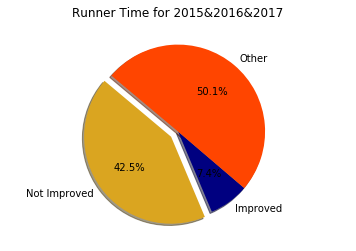

In [78]:
labels = [ "Not Improved","Improved","Other"]
sizes = [1060, 185,1252 ]
colors = ["goldenrod","navy", "orangered"]
explode = (0.1, 0, 0)
plt.axis("equal")
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Runner Time for 2015&2016&2017")
